xmin = [ 2.03743996 -0.97009565]
fmin = 0.002296020506891567
iterations = 8


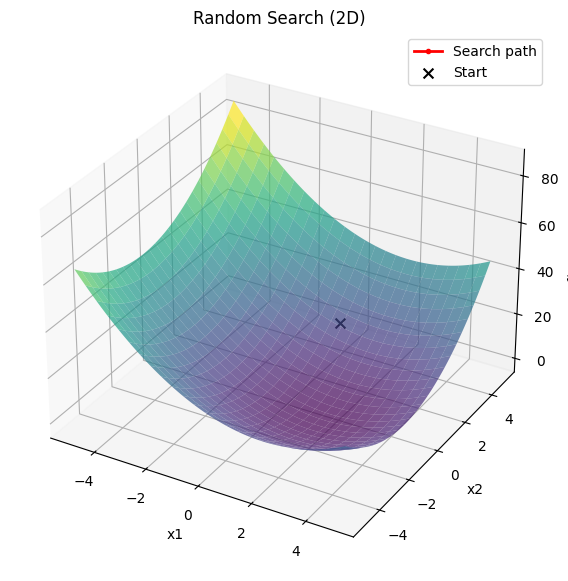

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def random_search(f, a, b, M, seed=None):
    a, b = np.asarray(a, float), np.asarray(b, float)
    if seed is not None:
        np.random.seed(seed)
    x = a + np.random.rand(*a.shape) * (b - a)
    best_x, best_f = x.copy(), f(x)
    hist = [best_x.copy()]
    for _ in range(M):
        x = a + np.random.rand(*a.shape) * (b - a)
        fx = f(x)
        if fx < best_f:
            best_x, best_f = x.copy(), fx
            hist.append(best_x.copy())
    return best_x, best_f, np.asarray(hist)

def f_test1(x):
    return (x[0] - 2) ** 2 + (x[1] + 1) ** 2

f = f_test1
a, b, M = [-5, -5], [5, 5], 5000

xmin, fmin, history = random_search(f, a, b, M)
print("xmin =", xmin)
print("fmin =", fmin)
print("iterations =", len(history))

x = np.linspace(a[0], b[0], 250)
y = np.linspace(a[1], b[1], 250)
X, Y = np.meshgrid(x, y)
Z = (X - 2)**2 + (Y + 1)**2

xs, ys = history[:, 0], history[:, 1]
zs = f(np.column_stack([xs, ys]))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.7, rstride=10, cstride=10, edgecolor="none")

(line,) = ax.plot([], [], [], "r.-", lw=2, markersize=6, label="Search path")
(point,) = ax.plot([], [], [], "ro", markersize=6)
ax.scatter(xs[0], ys[0], zs[0], color="black", s=50, marker="x", label="Start")

ax.set_xlabel("x1"); ax.set_ylabel("x2"); ax.set_zlabel("f(x1,x2)")
ax.set_title("Random Search (2D)")
ax.legend()

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def update(i):
    i = min(i, len(xs) - 1)
    line.set_data(xs[: i + 1], ys[: i + 1])
    line.set_3d_properties(zs[: i + 1])
    point.set_data([xs[i]], [ys[i]])
    point.set_3d_properties([zs[i]])
    return line, point

anim = FuncAnimation(fig, update, frames=len(xs), init_func=init,
                     interval=300, blit=False, repeat=False)
plt.show()

